In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
import math

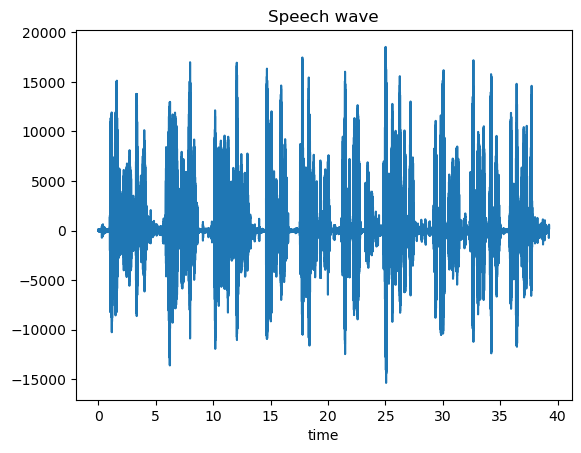

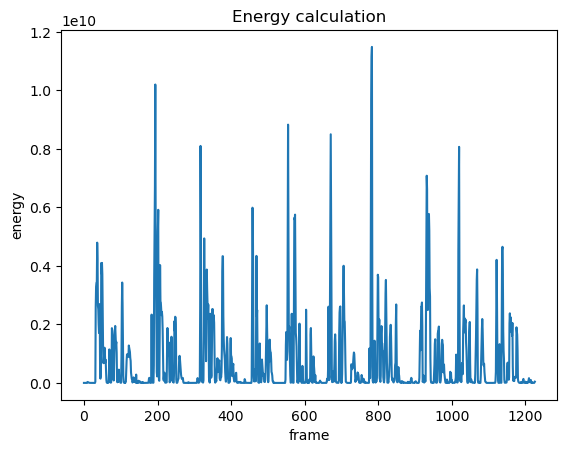

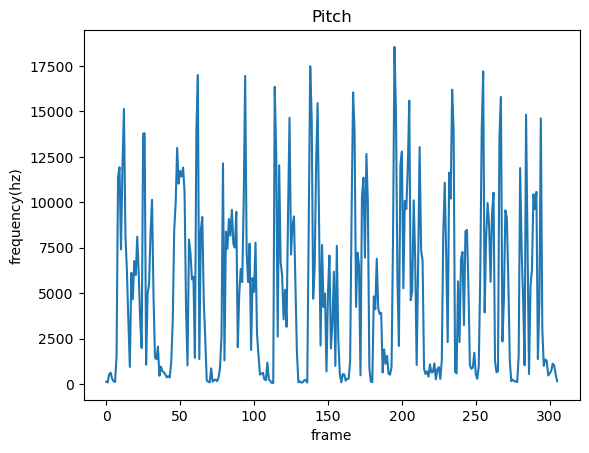

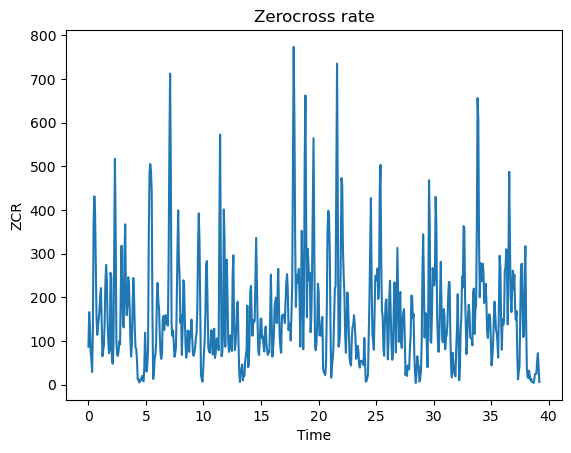

In [8]:
#energy
def callenergy(wave_data):
    energy = []
    sum = 0
    for i in range(len(wave_data)):
        sum = sum + (int(wave_data[i])* int(wave_data[i]))
        if (i+1)%256 ==0:
            energy.append(sum)
            sum = 0
        elif i == len(wave_data)-1:
            energy.append(sum)
    return energy

f = wave.open('sample1.wav','rb')
params = f.getparams()
nchannels,sampwidth,framerate,nframes = params[:4]
str_data = f.readframes(nframes)
str_data = np.frombuffer(str_data,dtype = 'int16')
f_rate = f.getframerate()
wave_data = np.frombuffer(str_data,dtype = np.short)

time = np.linspace(0,len(str_data)/f_rate,num = len(str_data))
plt.figure(1)
plt.plot(time,str_data)
plt.title("Speech wave")
plt.xlabel("time")

plt.figure()
energy = callenergy(wave_data)
plt.plot(energy)
plt.xlabel('frame')
plt.ylabel('energy')
plt.title('Energy calculation')

#pitch

FRAME_SIZE = 1024

def processframe(frame,Fs):
    freq = max(frame)
    return freq

Fs,data = read('sample1.wav')
numFrame = int(len(data)/FRAME_SIZE)
frequencies = np.zeros(numFrame)
for i in range(numFrame):
    frame = data[i*FRAME_SIZE:(i+1)*FRAME_SIZE]
    frequencies[i] = processframe(frame.astype(float),Fs)
    
    
plt.figure()
plt.plot(frequencies)
plt.xlabel('frame')
plt.ylabel('frequency(hz)')
plt.title('Pitch')

#ZCR
def zcrC0(wave_data,frame_size,overlap):
    wlen = len(wave_data)
    step = frame_size-overlap
    Framenum = math.ceil(wlen/step)
    zcr = np.zeros((Framenum,1))
    for i in range(Framenum):
        curFrame = wave_data[np.arange(i*step,min(i*step+frame_size,wlen))]
        curFrame = curFrame-np.mean(curFrame)
        zcr[i] = sum(curFrame[0:-1]*curFrame[1::]<=0)
    return zcr
overlap = 512
wave_data.shape = -1,1

zcr = zcrC0(wave_data,FRAME_SIZE,overlap)
time2 = np.arange(0,len(zcr))*(len(wave_data)/len(zcr)/f_rate)
plt.figure()
plt.plot(time2,zcr)
plt.title("Zerocross rate")
plt.xlabel("Time")
plt.ylabel("ZCR")
plt.show()
